<a href="https://colab.research.google.com/github/KarthikAnnavarapu/21691A3181/blob/main/Copy_of_Innovate_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install necessary libraries
!pip install opencv-python-headless
!pip install matplotlib

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from urllib.request import urlopen

In [ ]:
# Load the image using urlopen
image_url = "https://www.queenscliffe.vic.gov.au/files/assets/public/images/your-council/news-thumbnails/gellibrand-street-crossing.jpg?w=1200"
resp = urlopen(image_url)
image = np.asarray(bytearray(resp.read()), dtype="uint8")
image = cv2.imdecode(image, cv2.IMREAD_COLOR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

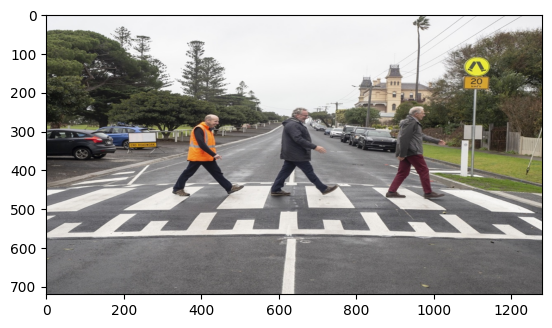

In [ ]:
# Resize the image for visualization (optional)
image_resized = cv2.resize(image, (1280, 720))
plt.imshow(image_resized)
plt.show()

In [ ]:
# Initialize HOG descriptor and SVM based pedestrian detector
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

In [ ]:
# Detect pedestrians in the image
(rects, weights) = hog.detectMultiScale(image_resized, winStride=(4, 4), padding=(8, 8), scale=1.05)

In [ ]:
# Draw bounding boxes around the detected pedestrians
for (x, y, w, h) in rects:
    cv2.rectangle(image_resized, (x, y), (x + w, y + h), (0, 255, 0), 2)

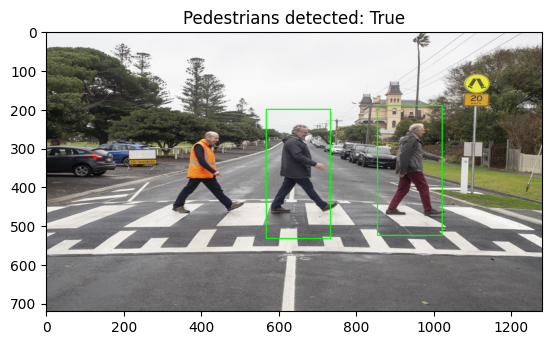

In [ ]:
# Display the image with detections
plt.imshow(image_resized)
plt.title(f'Pedestrians detected: {len(rects) > 0}')
plt.show()

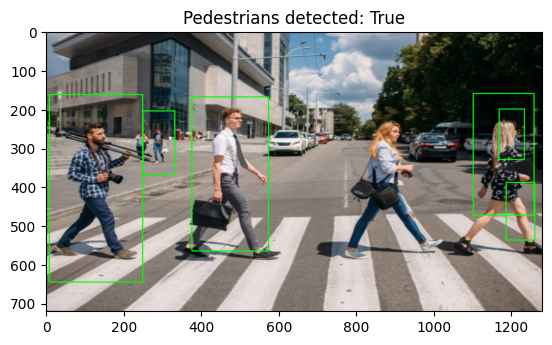

In [ ]:
# Test on a new image
test_image_url = "https://callsam.com/wp-content/uploads/2019/12/crosswalk-featured-750x500.jpg"

# Download and process the new image
import requests
try:
    response = requests.get(test_image_url)
    response.raise_for_status()  # Check for errors
    test_image = np.asarray(bytearray(response.content), dtype="uint8")
    test_image = cv2.imdecode(test_image, cv2.IMREAD_COLOR)
    test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)

    # Resize for consistent display
    test_image_resized = cv2.resize(test_image, (1280, 720))

    # Detect pedestrians in the new image
    (test_rects, test_weights) = hog.detectMultiScale(test_image_resized, winStride=(4, 4), padding=(8, 8), scale=1.05)

    # Draw bounding boxes around the detected pedestrians
    for (x, y, w, h) in test_rects:
        cv2.rectangle(test_image_resized, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Display the new image with detections
    plt.imshow(test_image_resized)
    plt.title(f'Pedestrians detected: {len(test_rects) > 0}')
    plt.show()

except requests.exceptions.RequestException as e:
    print(f"Error downloading image: {e}")